In [13]:
import sys
sys.path.append('../unifying_features')
sys.path.append('../data_serialization')
from serialization_preprocessing_io import *
from time_reference_io import *
from scene_identification_io import *
from scene_details_io import *
from character_identification_io import *
from character_details_io import *
nlp = spacy.load('en')

In [14]:
film = 'plus_one_2019'
srt_df, subtitle_df, sentence_df, vision_df, face_df = read_pickle(film)
scene_dictionaries = generate_scenes(vision_df, face_df, substantial_minimum=4, anchor_search=8)
character_dictionaries = generate_characters(scene_dictionaries)

In [15]:
character_dictionaries

{1: {'character_id': 1,
  'face_clusters': [0.0, 3.0, 11.0, 13.0, 17.0, 31.0],
  'scenes_present': [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17]},
 2: {'character_id': 2,
  'face_clusters': [2.0, 7.0, 8.0, 10.0, 22.0],
  'scenes_present': [2, 3, 4, 5, 7, 10, 11, 12, 13, 15, 16, 17]}}

In [16]:
character_clusters = generate_character_clusters(scene_dictionaries)
character_clusters

[[0.0, 3.0, 11.0, 13.0, 17.0, 31.0], [2.0, 7.0, 8.0, 10.0, 22.0]]

In [17]:
chosen_character = character_dictionaries[1]
character_face_clusters = chosen_character['face_clusters']

In [18]:
display_character_dialogue_context(character_face_clusters, sentence_df, nlp)

----------------
Direct questions
----------------
That makes it sadder, you know?
When were you gonna tell me?
Hey, Mr. Ricciardi, how are you?
Do you have one yet?
Are you gonna spend the rest of your life moping about Nate?
Have you ever heard of such a thing?
Do you have any rooms available?
How you doing, dude?
Do you hate Gina?
How did you get in here?
What do you mean, that's it?
Why do you want this so much?
Are you afraid of strong women?
Can you tell your girlfriend to keep it down?
Did you get that?
Do you need to use the girls' room?
Can you maybe not assault this one?
I just don't think my heart's in this anymore, you know?

-------------------------------------
Possible important terms, noun groups
-------------------------------------
['Ben', 'Alice', 'fun', 'Jess Ramsey', 'Gina']

-------------------------
First-person declarations
-------------------------
And plus, I got someone to look forward to.
I don't like my room.
I'm the best man, so I'm a little busy.
Alice, I

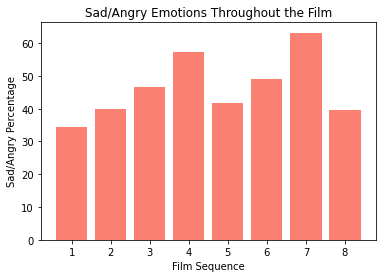

In [19]:
plot_character_filmwide_emotion(character_face_clusters, face_df)

In [20]:
chosen_character = character_dictionaries[2]
character_face_clusters = chosen_character['face_clusters']

In [21]:
display_character_dialogue_context(character_face_clusters, sentence_df, nlp)

----------------
Direct questions
----------------
Do you love me?
Are you smoking?
Like, you think I'd win?
Do you hear yourself right now?
The question was how are you so bad?
How else are you gonna find single girls like that?
Can you let it go?
Do you know what a best-man's speech is?
Why didn't you tell me your dad got engaged?
Why do you always say her first and last name like some sort of serial killer?
What am I supposed to do, you know?
Are you nervous?
Are you fucking serious right now?
You know you don't deserve a second chance, right?
And he's kind of checked out, you know?
They don't make sense to me as, like, a symbol of love, you know?
How are you?

-------------------------------------
Possible important terms, noun groups
-------------------------------------
['Thanks', 'love', 'Alice', 'a lot', 'Congratulations']

-------------------------
First-person declarations
-------------------------
I am!
I just told you it's amazing.
I'm fine.
I know how that sounded.
No, I-I

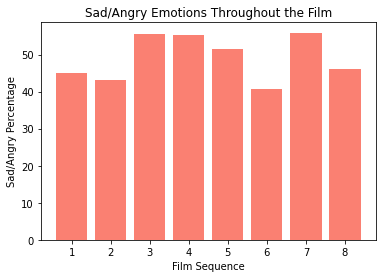

In [22]:
plot_character_filmwide_emotion(character_face_clusters, face_df)